In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
# 日本語フォントの指定
mpl.rcParams['font.family'] = 'IPAexGothic' # ここにインストールしたフォント名を入れる

from sklearn.model_selection import KFold
from sklearn.model_selection import GroupKFold
from sklearn.model_selection import StratifiedKFold
from nyaggle.feature.category_encoder import TargetEncoder

from nyaggle.experiment import run_experiment

In [2]:
train_ver1 = pd.read_csv('yukiCup2023Autumn-atmaCup_dataset/yukiCup 2023 Autumn x atmaCup/train_feature_ver1.csv')
test_ver1 = pd.read_csv('yukiCup2023Autumn-atmaCup_dataset/yukiCup 2023 Autumn x atmaCup/test_feature_ver1.csv')

train_ver2 = pd.read_csv('yukiCup2023Autumn-atmaCup_dataset/yukiCup 2023 Autumn x atmaCup/train_feature_ver2.csv')
test_ver2 = pd.read_csv('yukiCup2023Autumn-atmaCup_dataset/yukiCup 2023 Autumn x atmaCup/test_feature_ver2.csv')

era = pd.read_csv('yukiCup2023Autumn-atmaCup_dataset/yukiCup 2023 Autumn x atmaCup/era.csv')
sample_submission = pd.read_csv('yukiCup2023Autumn-atmaCup_dataset/yukiCup 2023 Autumn x atmaCup/sample_submission.csv')

In [3]:
train = pd.concat([train_ver1, train_ver2.iloc[:, 17:]], axis=1)
test = pd.concat([test_ver1, test_ver2.iloc[:, 16:]], axis=1)

In [4]:
train

,名称,棟名,種別2,国,時代,都道府県 ※美工品は「所有者住所（所在都道府県）」,所在地,保管施設の名称,所有者名,管理団体又は責任者,...,502,503,504,505,506,507,508,509,510,511
0,泉布観,NaN,近代／文化施設,NaN,明治,大阪府,大阪府大阪市北区天満橋一丁目1番1号,NaN,大阪市,NaN,...,0.040735,-0.065313,0.024066,0.058878,0.039472,-0.056688,0.060788,-0.017720,0.039419,-0.028479
1,絹本著色准胝仏母像,NaN,絵画,日本,鎌倉,京都府（京都府）,NaN,NaN,広隆寺,NaN,...,-0.015019,-0.015766,0.011216,0.049469,-0.003283,0.037911,-0.013454,0.032349,-0.018078,-0.066517
2,石上神宮拝殿,NaN,近世以前／寺院,NaN,鎌倉前期,奈良県,奈良県天理市布留町,NaN,石上神宮,NaN,...,-0.019966,-0.045495,0.018180,0.069067,0.033640,-0.031086,-0.029206,0.024308,-0.033962,-0.056491
3,剣〈銘真守（備前）／〉,NaN,工芸品,日本,鎌倉,和歌山県（和歌山県）,NaN,NaN,宗教法人金剛峯寺,財団法人高野山文化財保存会,...,-0.016288,0.025658,-0.018713,0.048917,0.038189,-0.005544,0.053331,0.070407,-0.056074,-0.017977
4,旧新町紡績所,工場本館,近代／産業・交通・土木,NaN,明治,群馬県,群馬県高崎市新町二三三〇番地,NaN,クラシエフーズ株式会社,NaN,...,0.037913,-0.039413,-0.000997,0.051042,0.070350,-0.041066,-0.049664,-0.045815,-0.029116,-0.069523
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6705,平家物語,NaN,書跡・典籍,日本,室町,東京都（東京都）,東京都世田谷区上野毛3-9-25,公益財団法人五島美術館,公益財団法人五島美術館,NaN,...,0.049616,-0.016639,-0.015519,0.023629,-0.067995,-0.025893,0.049082,0.051007,-0.070755,-0.005022
6706,因明論疏〈巻上中／〉,NaN,書跡・典籍,日本,平安,東京都（東京都）,東京都世田谷区上野毛3-9-25,公益財団法人五島美術館,公益財団法人五島美術館,NaN,...,0.049323,0.000817,0.012005,0.044559,-0.054302,-0.012325,0.045287,0.055104,-0.071356,-0.012268
6707,石燈籠,NaN,工芸品,日本,鎌倉,京都府（京都府）,公益財団法人北村文華財団 京都府京都市上京区御車道通清和院口上ル東入梶井町448-4,公益財団法人北村文華財団,公益財団法人北村文華財団,NaN,...,0.026567,0.025216,-0.019941,0.057561,-0.025222,-0.074834,-0.048308,0.024729,-0.028863,-0.005099
6708,孔雀経音義〈真寂法親王撰／〉,NaN,書跡・典籍,日本,平安,京都府（京都府）,NaN,NaN,醍醐寺,NaN,...,-0.024723,-0.036418,0.017122,0.045650,-0.039209,-0.005468,-0.041578,0.033754,-0.016572,-0.049764


In [5]:
agg_cols = ['min', 'max', 'mean', 'std']
use_cols = train_ver2.iloc[:, 17:].columns.tolist()

for col in ['時代', '所有者名', '種別2']:
    grp_df = train.groupby(col)[use_cols].agg(agg_cols)
    grp_df.columns = [f'{col}_' + '_'.join(c) for c in grp_df.columns]
    train = train.merge(grp_df, on=col, how='left')
    test = test.merge(grp_df, on=col, how='left')    

In [6]:
#categorical変数抽出
cat_cols = [c for c in test.columns if train[c].dtype == np.object]
#cat_cols.remove('string') # これは取り除かないといけない

# numerical変数抽出
num_cols = [c for c in test.columns if train[c].dtype != np.object]

#目的変数抽出
target_col = 'is_kokuhou'

print(cat_cols)
print(num_cols)
print(target_col)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  


['棟名', '種別2', '国', '時代', '都道府県 ※美工品は「所有者住所（所在都道府県）」', '所在地', '保管施設の名称', '所有者名', '管理団体又は責任者']
['緯度', '経度', '開始', '終了', '緯度*経度', '終了-開始', 'label_棟名', 'label_種別2', 'label_国', 'label_時代', 'label_都道府県 ※美工品は「所有者住所（所在都道府県）」', 'label_所在地', 'label_保管施設の名称', 'label_所有者名', 'label_管理団体又は責任者', 'count_棟名', 'count_種別2', 'count_国', 'count_時代', 'count_都道府県 ※美工品は「所有者住所（所在都道府県）」', 'count_所在地', 'count_保管施設の名称', 'count_所有者名', 'count_管理団体又は責任者', '棟名_緯度_min', '棟名_緯度_max', '棟名_緯度_mean', '棟名_緯度_std', '棟名_経度_min', '棟名_経度_max', '棟名_経度_mean', '棟名_経度_std', '棟名_開始_min', '棟名_開始_max', '棟名_開始_mean', '棟名_開始_std', '棟名_終了_min', '棟名_終了_max', '棟名_終了_mean', '棟名_終了_std', '棟名_緯度*経度_min', '棟名_緯度*経度_max', '棟名_緯度*経度_mean', '棟名_緯度*経度_std', '棟名_終了-開始_min', '棟名_終了-開始_max', '棟名_終了-開始_mean', '棟名_終了-開始_std', '種別2_緯度_min', '種別2_緯度_max', '種別2_緯度_mean', '種別2_緯度_std', '種別2_経度_min', '種別2_経度_max', '種別2_経度_mean', '種別2_経度_std', '種別2_開始_min', '種別2_開始_max', '種別2_開始_mean', '種別2_開始_std', '種別2_終了_min', '種別2_終了_max', '種別2_終了_mean', '種別2_終了_std', '種

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:6: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  


In [7]:
# target encoding

# kf = KFold(4)
# kf = KFold(4, groups=train.categorical)　#GroupKFold
kf = StratifiedKFold(5, shuffle=True, random_state=42531) #StratifiedKFold

# Target encoding with K-fold
# te = TargetEncoder(kf.split(train))
# te = TargetEncoder(kf.split(train)) #GroupKFold
te = TargetEncoder(kf.split(train, train[target_col])) #StratifiedKFold

# use fit/fit_transform to train data, then apply transform to test data
train.loc[:, cat_cols] = te.fit_transform(train[cat_cols], train[target_col])
test.loc[:, cat_cols] = te.transform(test[cat_cols])

In [8]:
# 欠損値を埋める
train.fillna(-1, inplace=True)
test.fillna(-1, inplace=True)

In [9]:
print(len(cat_cols) + len(num_cols))

6904


In [11]:
from sklearn.ensemble import RandomForestClassifier

params = {
    'n_estimators': 500,
    'verbose': 1,
    'min_samples_leaf': 10,
    'random_state': 42531,
    'n_jobs': -1
}

result = run_experiment(
    params,
    train[num_cols + cat_cols],
    train[target_col],
    test[num_cols + cat_cols],
    cv=StratifiedKFold(5, shuffle=True, random_state=42531), # cv=4,
    #groups = train.book_id,
    #categorical_feature=["user_id","book_id"],→これLGBM用？
    algorithm_type=RandomForestClassifier
)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    2.3s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:    5.1s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    5.9s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 434 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 500 out of 500 | elapsed:    0.1s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 434 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 500 out of 500 | elapsed:    0.2s finis

In [12]:
print(result.metrics) # Evalulation metrics for each fold

[0.8238566827697261, 0.8055676328502415, 0.826964573268921, 0.8114694041867955, 0.8204577911457543, 0.8171362219995506]


In [11]:
print(result.metrics) # Evalulation metrics for each fold

[0.7939371980676329, 0.7870933977455716, 0.811561996779388, 0.7989895330112721, 0.817928690532228, 0.8007404421307167]


In [33]:
print(result.metrics) # Evalulation metrics for each fold

[0.8174516908212561, 0.7968478260869566, 0.8092431561996779, 0.8114533011272141, 0.8378184313193608, 0.8137532311765582]


In [13]:
print(result.metrics) # Evalulation metrics for each fold

[0.8280636070853462, 0.8003582930756844, 0.8178743961352657, 0.8081239935587762, 0.8350818965861131, 0.8174789091490074]


In [10]:
print(result.metrics) # Evalulation metrics for each fold

[0.7830434782608695, 0.7822745571658616, 0.8266908212560387, 0.8261433172302737, 0.8351138095276086, 0.8096638097616974]


In [9]:
print(result.metrics) # Evalulation metrics for each fold

[0.7725885668276973, 0.7818236714975845, 0.8162882447665056, 0.817194041867955, 0.8370046513112228, 0.8053098184368901]


In [13]:
IM = result.importance     # Feature importance for each fold

In [14]:
IM[2].sort_values('importance', ascending=False).head(20)

IndexError: list index out of range

In [15]:
print(result.test_prediction)  # Test prediction in numpy array
print(result.oof_prediction)   # Out-of-fold prediction in numpy array

[0.00887194 0.17030693 0.3100253  ... 0.24574326 0.02029414 0.00547636]
[0.01824232 0.09317176 0.41198339 ... 0.09917929 0.28640147 0.01535514]


In [16]:
train[target_col].to_numpy()

array([0, 0, 1, ..., 0, 0, 0])

In [17]:
# データ全体のF1スコアを計算 & 閾値の最適化
from sklearn.metrics import f1_score

def find_optimal_threshold(y_true, y_scores):
    thresholds = np.linspace(0, 1, 100)
    best_threshold = 0
    best_score = 0

    for threshold in thresholds:
        y_pred = (y_scores > threshold).astype(int)
        score = f1_score(y_true, y_pred)

        if score > best_score:
            best_score = score
            best_threshold = threshold

    return best_threshold, best_score

# 例として使用するデータ（実際にはモデルからの予測値と実際のラベルを使用）
y_true = train[target_col].values
y_scores = result.oof_prediction

best_threshold, best_f1_score = find_optimal_threshold(y_true, y_scores)
print(f"Best threshold: {best_threshold}")
print(f"Best F1 Score: {best_f1_score}")

Best threshold: 0.20202020202020204
Best F1 Score: 0.384


In [18]:
# 閾値を超える確率を持つ要素を1に、それ以外を0に変換
y_pred = (result.test_prediction > best_threshold).astype(int)
print(y_pred)
print(y_pred.shape)

[0 0 1 ... 1 0 0]
(10065,)


In [19]:
sample_submission['is_kokuhou'] = y_pred
sample_submission

,is_kokuhou
0,0
1,0
2,1
3,0
4,0
...,...
10060,0
10061,0
10062,1
10063,0


In [20]:
sample_submission["is_kokuhou"].value_counts()

0    9067
1     998
Name: is_kokuhou, dtype: int64

In [22]:
sample_submission.to_csv('RF_ver2.csv', index=False)

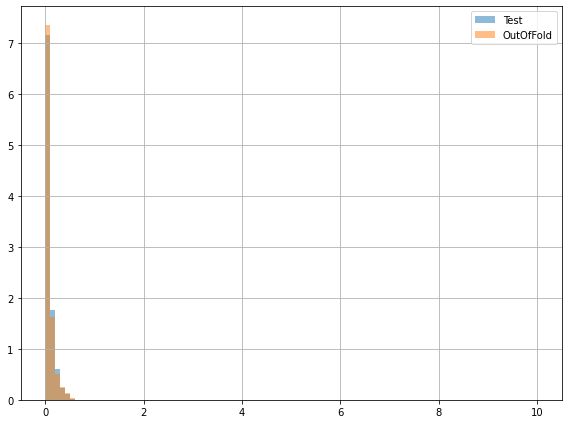

In [21]:
fig, ax = plt.subplots(figsize=(8, 6))

vmax = .02
bins = np.linspace(0, 10, 100)
ax.hist(result.test_prediction, bins=bins, density=True, alpha=.5, label="Test")
ax.hist(result.oof_prediction, bins=bins, density=True, alpha=.5, label="OutOfFold")
ax.grid()
ax.legend()
# ax.set_title("テストと学習時の予測傾向差分")

fig.tight_layout()